In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.1,
                           rotation_range=20,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           brightness_range=(0.5,1.5),
                           horizontal_flip=True,
                           vertical_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/AI/VietnamMoney/Training',
                                       target_size = (100,100),
                                       class_mode = 'categorical',
                                       shuffle = True)
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/AI/VietnamMoney/Validation',
                                       target_size = (100,100),
                                       class_mode = 'categorical',
                                       shuffle = True)

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Found 859 images belonging to 11 classes.
Found 83 images belonging to 11 classes.
Epoch 1/30
27/27 [==============================] - 73s 3s/step - loss: 4.1338 - accuracy: 0.0955 - val_loss: 2.3989 - val_accuracy: 0.1446
Epoch 2/30
27/27 [==============================] - 69s 3s/step - loss: 2.3190 - accuracy: 0.1607 - val_loss: 2.2978 - val_accuracy: 0.1205
Epoch 3/30
27/27 [==============================] - 69s 3s/step - loss: 2.2263 - accuracy: 0.1956 - val_loss: 2.1609 - val_accuracy: 0.2651
Epoch 4/30
27/27 [==============================] - 69s 3s/step - loss: 2.1223 - accuracy: 0.2561 - val_loss: 2.2206 - val_accuracy: 0.2410
Epoch 5/30
27/27 [==============================] - 69s 3s/step - loss: 2.0893 - accuracy: 0.2608 - val_loss: 2.1200 - val_accuracy: 0.2771
Epoch 6/30
27/27 [==============================] - 69s 3s/step - loss: 1.9779 - accuracy: 0.3190 - val_loss: 2.2941 - val_accuracy: 0.2289
Epoch 7/30
27/27 [==============================] - 69s 3s/step - loss: 1.945

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 43808)             0         
                                                                 
 dense_27 (Dense)            (None, 128)             

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  2.512387275695801
độ chính xác kiểm tra là:  0.5783132314682007


In [ ]:
train_data.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

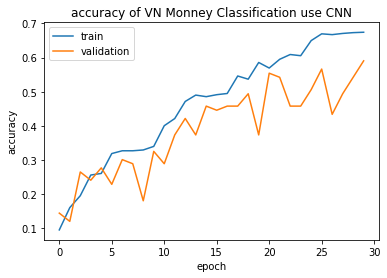

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of VN Monney Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/VN_Monney_Classification_CNN.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/AI/VN_Monney_Classification_CNN.h5')

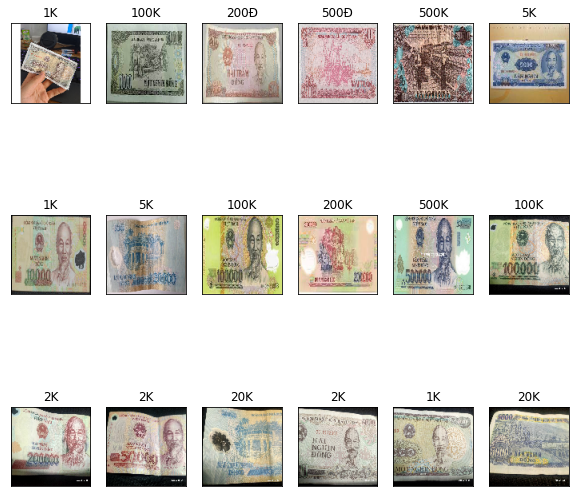

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['100K','10K','1K','200K','200Đ','20K','2K','500K','500Đ','50K','5K']
dir = '/content/drive/MyDrive/AI/VietnamMoney/Test'
plt.figure(figsize=(10,10))
for i in range(18):
  plt.subplot(3,6,i + 1)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(100,100))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])